<a href="https://colab.research.google.com/github/Akashpandey1507/Analyse-Promotions-and-Provide-Tangible-Insights-to-Sales-Director/blob/main/dcf_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

In [27]:
# Define the stock ticker
ticker = "POLYCAB.NS" #tell me the ticker of stock
periods = "6mo"
timeframe = "1d"

# Define assumptions
growth_rate = 0.18  # 12% annual growth
discount_rate = 0.14  # 10% WACC
terminal_growth = 0.04  # 4% long-term growth
years = 5  # Projection period



In [25]:
# Fetch historical stock data (last 6 months)
data = yf.download(ticker, period=periods, interval=timeframe)

# Display the first few rows
data


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,POLYCAB.NS,POLYCAB.NS,POLYCAB.NS,POLYCAB.NS,POLYCAB.NS
Date,,,,,
2024-07-29,6583.549805,6639.750000,6540.000000,6584.950195,386209
2024-07-30,6681.750000,6701.000000,6554.649902,6583.000000,531991
2024-07-31,6858.200195,6882.000000,6681.750000,6681.750000,806650
2024-08-01,6775.049805,6906.000000,6760.000000,6900.000000,248158
2024-08-02,6751.500000,6839.950195,6674.799805,6678.549805,285579
...,...,...,...,...,...
2025-01-23,6250.899902,6464.000000,6143.549805,6179.950195,1215099
2025-01-24,5915.799805,6407.850098,5891.200195,6293.899902,1354910


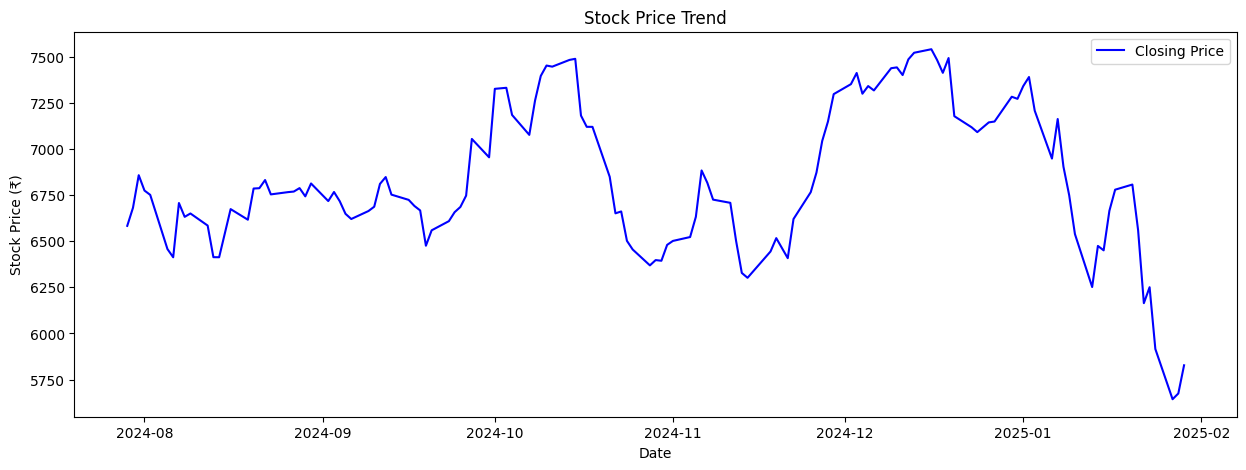

In [9]:
# Plot Closing Price Trend
plt.figure(figsize=(15, 5))
plt.plot(data.index, data["Close"], label="Closing Price", color="blue")
plt.xlabel("Date")
plt.ylabel("Stock Price (₹)")
plt.title("Stock Price Trend")
plt.legend()
plt.show()


In [10]:
# Get stock information
company_info = yf.Ticker(ticker).info

# Extract key financial data
market_cap = company_info["marketCap"]
pe_ratio = company_info.get("trailingPE", "N/A")
sector = company_info["sector"]

print(f"Market Cap: ₹{market_cap:,}")
print(f"P/E Ratio: {pe_ratio}")
print(f"Sector: {sector}")


Market Cap: ₹877,083,951,104
P/E Ratio: 47.794262
Sector: Industrials


In [16]:
# Fetch stock data
stock = yf.Ticker(ticker)

# Get financials
income_statement = stock.financials  # Income Statement
balance_sheet = stock.balance_sheet  # Balance Sheet
cashflow = stock.cashflow  # Cash Flow Statement

print("\nCash Flow Statement:\n", cashflow)

"""# Print key financial data
print("Income Statement:\n", income_statement)
print("\nBalance Sheet:\n", balance_sheet)
print("\nCash Flow Statement:\n", cashflow)"""



Cash Flow Statement:
                                              2024-03-31      2023-03-31  \
Free Cash Flow                             4377210000.0    9480680000.0   
Repayment Of Debt                           -26400000.0     -37500000.0   
Issuance Of Debt                            231750000.0      40100000.0   
Issuance Of Capital Stock                   193950000.0     127650000.0   
Capital Expenditure                       -8585190000.0   -4794530000.0   
End Cash Position                          2764420000.0    1194920000.0   
Beginning Cash Position                    1194920000.0    1216890000.0   
Changes In Cash                            1569500000.0     -21970000.0   
Financing Cash Flow                       -3874130000.0   -2270720000.0   
Interest Paid Cff                         -1059000000.0    -508710000.0   
Cash Dividends Paid                       -2997300000.0   -2094490000.0   
Common Stock Dividend Paid                          NaN   -2094490000.0   
Ne

'# Print key financial data\nprint("Income Statement:\n", income_statement)\nprint("\nBalance Sheet:\n", balance_sheet)\nprint("\nCash Flow Statement:\n", cashflow)'

In [24]:
# Extract Operating Cash Flow & CapEx
operating_cashflow = cashflow.loc["Operating Cash Flow"][0]
capex = cashflow.loc["Net PPE Purchase And Sale"][0]

# Calculate Free Cash Flow (FCF)
fcf = operating_cashflow + capex

print("Cash from Opetating Activities:", operating_cashflow)
print("Capital Expenditures:", capex)
print(f"Free Cash Flow (FCF): ₹{fcf:,}")


Cash from Opetating Activities: 12962400000.0
Capital Expenditures: -8524080000.0
Free Cash Flow (FCF): ₹4,438,320,000.0


<ipython-input-24-b231ad91d248>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  operating_cashflow = cashflow.loc["Operating Cash Flow"][0]
<ipython-input-24-b231ad91d248>:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  capex = cashflow.loc["Net PPE Purchase And Sale"][0]


In [28]:
# Project FCF for 5 years
fcf_projections = []
for i in range(1, years+1):
    projected_fcf = fcf * (1 + growth_rate) ** i
    fcf_projections.append(projected_fcf)

print("Projected FCFs:", [f"Year {i+1}: ₹{round(f, 2):,}" for i, f in enumerate(fcf_projections)])


Projected FCFs: ['Year 1: ₹5,237,217,600.0', 'Year 2: ₹6,179,916,768.0', 'Year 3: ₹7,292,301,786.24', 'Year 4: ₹8,604,916,107.76', 'Year 5: ₹10,153,801,007.16']


In [29]:
# Discount FCFs
pv_fcf = [fcf / (1 + discount_rate) ** (i+1) for i, fcf in enumerate(fcf_projections)]

# Sum of discounted FCFs
total_pv_fcf = sum(pv_fcf)

print(f"Total Present Value of FCFs: ₹{round(total_pv_fcf, 2):,}")


Total Present Value of FCFs: ₹24,639,758,984.3


In [30]:
# Calculate Terminal Value
terminal_value = (fcf_projections[-1] * (1 + terminal_growth)) / (discount_rate - terminal_growth)

# Discount Terminal Value
pv_terminal_value = terminal_value / (1 + discount_rate) ** years

print(f"Terminal Value (Discounted): ₹{round(pv_terminal_value, 2):,}")


Terminal Value (Discounted): ₹54,845,087,099.55


In [32]:
# Enterprise Value (EV)
enterprise_value = total_pv_fcf + pv_terminal_value

# Get number of outstanding shares
shares_outstanding = stock.info["sharesOutstanding"]

# Intrinsic Share Price
intrinsic_value_per_share = enterprise_value / shares_outstanding

print(f"Enterprise Value: ₹{round(enterprise_value, 2):,}")
print(f"Share Outstanding: ₹{round(shares_outstanding, 2):,}")
print(f"Intrinsic Share Price: ₹{round(intrinsic_value_per_share, 2):,}")


Enterprise Value: ₹79,484,846,083.85
Share Outstanding: ₹150,420,000
Intrinsic Share Price: ₹528.42
